# Wroclaw Public Transport

***

#### About the notebook
In this notebook, I will make some geographical analysis of the public transport in Wroclaw, Poland.

<br>

***

#### About the dataset
This GPS dataset is from [www.kaggle.com](https://www.kaggle.com). It was collected by the user [Piotr](https://www.kaggle.com/pieca111). It represents data from public transport vehicles in Wrocław, Poland in the period 2022-04-13 to 2022-04-30.

***

### (1) Import data from CSV

In [86]:
# IMPORTS
import pandas as pd

# LOAD CSV IN DATAFRAME
df = pd.read_csv("../data/positions.csv",
                 dtype='unicode',
                 names=["ID",
                        "Vehicle-ID",
                        "Line",
                        "Type",
                        "Latitude",
                        "Longitude",
                        "Timestamp",
                        ])

# DELETE FIRST ROW
df = df.iloc[1: , :]

FileNotFoundError: [Errno 2] No such file or directory: '../data/positions.csv'

### (2) Print dataframe to explore data

In [54]:
df.head(100)

,ID,Vehicle-ID,Line,Type,Latitude,Longitude,Timestamp,Date,Time
1,1,19707402,33,tram,51.113544,17.067019,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
2,2,19707424,33,tram,51.11554,17.074562,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
3,3,19679615,31,tram,51.112755,17.012657,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
4,4,19679761,31,tram,51.112915,17.01011,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
5,5,19679724,31,tram,51.12958,16.982096,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
...,...,...,...,...,...,...,...,...,...
96,96,19767216,d,bus,51.15687,17.121798,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
97,97,19767441,k,bus,7158.279,7158.279,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
98,98,19708471,70,tram,51.121685,17.043598,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
99,99,19764541,131,bus,51.14542,17.108097,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755


### (3) Prepare data

#### Split and convert 'Timestamp' into 'Date' and 'Time'

In [51]:
# SPLIT TIMESTAMP
df[['Date', 'Time']] = df['Timestamp'].str.split('T', 1, expand=True)

In [57]:
# CONVERT DATE
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')

In [61]:
# CONVERT TIME
df['Time'] = pd.to_datetime(df.Time, format ='%H:%M:%S.%f', errors = 'coerce').dt.time # TIME IS STILL AN OBJECT

In [62]:
# REMOVE CHARACTER IN TIMESTAMP
df['Timestamp'] = df["Timestamp"].str.replace("T"," ")

AttributeError: Can only use .str accessor with string values!

In [55]:
# CONVERT TIMESTAMP
df['Timestamp'] = pd.to_datetime(df.Timestamp, format='%Y-%m-%d %H:%M:%S.%f')

In [ ]:
# PRINT DTYPES OF DATAFRAME
df.dtypes

#### Convert Geo-Positions (Latitude, Longitude)


In [59]:
# CONVERT LATITUDE
df = df.astype({'Latitude':'float'})
# CONVERT LONGITUDE
df = df.astype({'Longitude':'float'})

#### Remove Outliers (Latitude, Longitude)

In [84]:
# SORT DATAFRAME DESCENDING
df.sort_values('Latitude', ascending=False)

,ID,Vehicle-ID,Line,Type,Latitude,Longitude,Timestamp,Date,Time
3348752,3348752,19709911,20,tram,54.522713,21.743164,2022-04-15 13:33:21.100799,2022-04-15,13:33:21.100799
3349254,3349254,19709911,20,tram,54.522713,21.743164,2022-04-15 13:33:36.105972,2022-04-15,13:33:36.105972
3349756,3349756,19709911,20,tram,54.522713,21.743164,2022-04-15 13:33:51.133777,2022-04-15,13:33:51.133777
3348247,3348247,19709911,20,tram,54.499115,21.735200,2022-04-15 13:33:06.132351,2022-04-15,13:33:06.132351
3347742,3347742,19709911,20,tram,54.458454,21.720646,2022-04-15 13:32:51.141193,2022-04-15,13:32:51.141193
...,...,...,...,...,...,...,...,...,...
18379619,18379619,19741102,33,tram,0.000000,0.000000,2022-04-25 14:32:57.027006,2022-04-25,14:32:57.027006
17766316,17766316,19741096,33,tram,0.000000,0.000000,2022-04-25 08:50:26.180926,2022-04-25,08:50:26.180926
7522012,7522012,19766067,602,bus,0.000000,0.000000,2022-04-19 05:54:52.140375,2022-04-19,05:54:52.140375
17984367,17984367,19741098,33,tram,0.000000,0.000000,2022-04-25 11:11:11.527842,2022-04-25,11:11:11.527842


In [79]:
# DROP OUTLIERS IN LATITUDE
df.drop(index=df[df['Latitude'] >= 60].index, inplace=True)
# DROP OUTLIERS IN LONGITUDE
df.drop(index=df[df['Longitude'] >= 60].index, inplace=True)

#### Print prepared dataframe

In [85]:
# PRINT
df.head(100)

,ID,Vehicle-ID,Line,Type,Latitude,Longitude,Timestamp,Date,Time
1,1,19707402,33,tram,51.113544,17.067019,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
2,2,19707424,33,tram,51.115540,17.074562,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
3,3,19679615,31,tram,51.112755,17.012657,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
4,4,19679761,31,tram,51.112915,17.010110,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
5,5,19679724,31,tram,51.129580,16.982096,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
...,...,...,...,...,...,...,...,...,...
96,96,19767216,d,bus,51.156870,17.121798,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
98,98,19708471,70,tram,51.121685,17.043598,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
99,99,19764541,131,bus,51.145420,17.108097,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755
100,100,19765270,144,bus,51.105946,17.023780,2022-04-13 11:34:46.810755,2022-04-13,11:34:46.810755


### (4) Visualise data

In [14]:
new_df = pd.DataFrame()
new_df = df[df['Date'] == '2022-04-22']

In [15]:
len(new_df.index)

1916908

In [22]:
df['Type'].value_counts()

bus     16155621
tram     9504682
Name: Type, dtype: int64

In [27]:
time_df = pd.DataFrame()
time_df = new_df.groupby(['Type', 'Timestamp']).size().to_frame('Count')
time_df

Count
Type Timestamp                        
bus  2022-04-22 00:00:00.969891     30
     2022-04-22 00:00:15.714395     30
     2022-04-22 00:00:32.549472     30
     2022-04-22 00:00:47.071730     30
     2022-04-22 00:01:01.431612     31
...                                ...
tram 2022-04-22 23:58:47.124392      2
     2022-04-22 23:59:02.134418      2
     2022-04-22 23:59:17.147913      2
     2022-04-22 23:59:32.125862      2
     2022-04-22 23:59:47.141885      2

[11073 rows x 1 columns]

In [28]:
time_df.dtypes

Count    int64
dtype: object

<AxesSubplot:xlabel='Timestamp', ylabel='Count'>

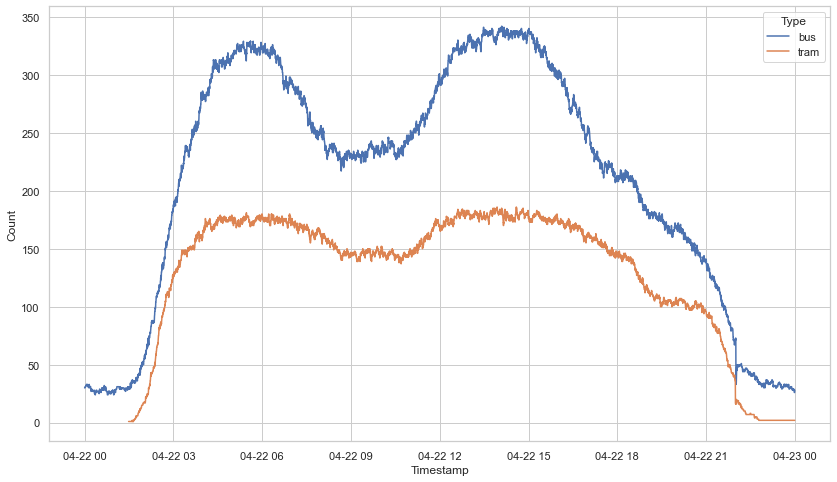

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)

# Plot
sns.lineplot(x="Timestamp", y="Count", hue="Type", data=time_df)